In [1]:
#import all of the libries that i need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import itertools
import warnings
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from joblib import parallel_backend

from sklearn import preprocessing


In [2]:
pip install --upgrade bottleneck


  Obtaining dependency information for bottleneck from https://files.pythonhosted.org/packages/a7/ef/f5ee62f290f61842b34413ae82042825556ee1078e195d0e34c674fdc72e/Bottleneck-1.3.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/110.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 110.1/110.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [75]:
head= ['Subject_ID','Sex','Age_(years)','Weight_(kg)','Height_(cm)']

In [76]:
df_subjects=pd.DataFrame(data=[[101,'Female',55,73,169],[102,'Male',61,85,180],[103,'Male',23,95,180],[104,'Female',48,55,158],[105,'Male',53,98,175]],columns=['Subject_ID','Sex','Age_(years)','Weight_(kg)','Height_(cm)'])

In [77]:
df_subjects.head(5)

,Subject_ID,Sex,Age_(years),Weight_(kg),Height_(cm)
0,101,Female,55,73,169
1,102,Male,61,85,180
2,103,Male,23,95,180
3,104,Female,48,55,158
4,105,Male,53,98,175


In [78]:
#creat a data for the candidates
# initialising dataframe

head2= ['Subject_ID','activity_id','unit']
headers = ['time_index','acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']

df_raw=pd.DataFrame(columns=headers)
for i in range(1,len(head2)+1): 

    df_raw.insert(loc=0,column=head2[-i],value="")
 



In [79]:
df_raw.head(5)

,Subject_ID,activity_id,unit,time_index,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z


In [80]:
import pandas as pd

# Define column headers
head3 = ['Subject_ID', 'activity_id']
headers3 = ['execution_type','start','end']

# Create an empty DataFrame with column headers

df_raw3 = pd.DataFrame(columns=headers)
# Insert empty columns for 'Subject_ID', 'activity_id', 'unit'
for i in range(1, len(head2) + 1):
    
    df_raw3.insert(loc=0, column=head2[-i], value="")


In [81]:

filename = '111template.txt'
df = pd.read_csv(filename, sep=';', header=0)

# Display the DataFrame


In [82]:
df.head(5)

,time index,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,1,-9.665799,-1.677241,0.615063,-0.014956,0.004388,0.010589,0.587318,0.455106,-0.094949
1,2,-9.665806,-1.684737,0.622513,0.000607,-0.003094,-0.007589,0.587428,0.455621,-0.093364
2,3,-9.628410,-1.699724,0.585751,0.006007,0.000557,-0.004879,0.588389,0.454722,-0.094907
3,4,-9.628372,-1.684836,0.600733,-0.003085,-0.000281,-0.000340,0.588673,0.455759,-0.092664
4,5,-9.643291,-1.639893,0.585661,-0.002932,-0.006807,-0.013043,0.589193,0.453927,-0.093143


In [83]:
#df_raw=pd.DataFrame(columns=headers)
df_raw.head(5)

,Subject_ID,activity_id,unit,time_index,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z


In [84]:
for i in range(1, 6):
    for k in range(1, 9):
        for j in range(1, 6):
            # Read data from template file
            df2 = pd.read_csv(f"{i}{k}{j}template.txt", sep=';', header=0)
            # Read data from test file
            #df3 = pd.read_csv(f"{i}{k}{j}test.txt", sep=';', header=0)
            # Add Subject_ID, activity_id, and unit columns
            df2["Subject_ID"] = i
            df2["activity_id"] = k
            df2["unit"] = j
            #df3["Subject_ID"] = i
            #df3["activity_id"] = k
            #df3["unit"] = j
            # Concatenate df2 and df3 to df_raw
            df_raw = pd.concat([df_raw, df2], ignore_index=True)
            #df_raw = pd.concat([df_raw, df3], ignore_index=True)



C:\Users\spin 3\AppData\Local\Temp\ipykernel_10436\736965609.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_raw = pd.concat([df_raw, df2], ignore_index=True)


In [85]:
#drop  column
df_raw.drop(columns=["time_index"],inplace=True)

In [86]:
#change columns name 
headers=['time index']
columns = {"time index" : "time_index"
          }

df_raw.rename(columns=columns,inplace=True)



In [87]:
df_raw.head(5)

,Subject_ID,activity_id,unit,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,time_index
0,1,1,1,-9.665799,-1.677241,0.615063,-0.014956,0.004388,0.010589,0.587318,0.455106,-0.094949,1.0
1,1,1,1,-9.665806,-1.684737,0.622513,0.000607,-0.003094,-0.007589,0.587428,0.455621,-0.093364,2.0
2,1,1,1,-9.628410,-1.699724,0.585751,0.006007,0.000557,-0.004879,0.588389,0.454722,-0.094907,3.0
3,1,1,1,-9.628372,-1.684836,0.600733,-0.003085,-0.000281,-0.000340,0.588673,0.455759,-0.092664,4.0
4,1,1,1,-9.643291,-1.639893,0.585661,-0.002932,-0.006807,-0.013043,0.589193,0.453927,-0.093143,5.0


In [88]:
for i in range(1, 6):
    for k in range(1, 9):
        for j in range(1, 6):
            # Read data from template file
            #df2 = pd.read_csv(f"{i}{k}{j}template.txt", sep=';', header=0)
            # Read data from test file
            df3 = pd.read_csv(f"{i}{k}{j}test.txt", sep=';', header=0)
            # Add Subject_ID, activity_id, and unit columns
            #df2["Subject_ID"] = i
            #df2["activity_id"] = k
            #df2["unit"] = j
            df3["Subject_ID"] = i
            df3["activity_id"] = k
            df3["unit"] = j
            # Concatenate df2 and df3 to df_raw
            #df_raw = pd.concat([df_raw, df2], ignore_index=True)
            df_raw2 = pd.concat([df_raw, df3], ignore_index=True)

In [89]:
#drop  column
df_raw2.drop(columns=["time_index"],inplace=True)

In [90]:
#change columns name 
headers=['time index']
columns = {"time index" : "time_index"
          }

df_raw2.rename(columns=columns,inplace=True)



In [91]:
df_raw2.head(5)

,Subject_ID,activity_id,unit,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,time_index
0,1,1,1,-9.665799,-1.677241,0.615063,-0.014956,0.004388,0.010589,0.587318,0.455106,-0.094949,NaN
1,1,1,1,-9.665806,-1.684737,0.622513,0.000607,-0.003094,-0.007589,0.587428,0.455621,-0.093364,NaN
2,1,1,1,-9.628410,-1.699724,0.585751,0.006007,0.000557,-0.004879,0.588389,0.454722,-0.094907,NaN
3,1,1,1,-9.628372,-1.684836,0.600733,-0.003085,-0.000281,-0.000340,0.588673,0.455759,-0.092664,NaN
4,1,1,1,-9.643291,-1.639893,0.585661,-0.002932,-0.006807,-0.013043,0.589193,0.453927,-0.093143,NaN


In [92]:
df_raw2.dtypes

Subject_ID      object
activity_id     object
unit            object
acc_x          float64
acc_y          float64
acc_z          float64
gyr_x          float64
gyr_y          float64
gyr_z          float64
mag_x          float64
mag_y          float64
mag_z          float64
time_index     float64
dtype: object

In [93]:
df_raw['unit'] = df_raw['unit'].astype(int)
df_raw['Subject_ID'] = df_raw['Subject_ID'].astype(int)
df_raw['activity_id'] = df_raw['activity_id'].astype(int)
df_raw2['unit'] = df_raw2['unit'].astype(int)
df_raw2['Subject_ID'] = df_raw2['Subject_ID'].astype(int)
df_raw2['activity_id'] = df_raw2['activity_id'].astype(int)

In [94]:
print(df_raw2['activity_id'].unique())


[1 2 3 4 5 6 7 8]


In [183]:
df_raw2['activity_id'].value_counts()


activity_id
1    39845
2    37345
8    36902
3    36380
7    33505
6    33285
4    32660
5    31795
Name: count, dtype: int64

In [152]:
print(df_raw.columns)

Index(['Subject_ID', 'activity_id', 'unit', 'acc_x', 'acc_y', 'acc_z', 'gyr_x',
       'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z', 'time_index'],
      dtype='object')


In [200]:
#count time_index missing
time_index_count=df_raw2['time_index'].isna().sum()
print("There are " + f'{time_index_count:,.0f}' + " mtime_index rate records due to difference in frequency.")

There are 276,625 mtime_index rate records due to difference in frequency.


In [ ]:
#replace heart rate missing
df_heart_fill=df_raw2
df_heart_fill.loc[:,'heart_rate']=df_raw2.loc[:,['heart_rate']].fillna(method='bfill',axis=0)
incomplete_records_count=df_heart_fill.isna().any(axis=0).sum()
data_set_size=df_heart_fill.shape[0]
print("After filling the missing heart data, there are " + f'{incomplete_records_count:,.0f}'.format(incomplete_records_count) + 
      " records missing one or more values, out of a data set of size " + f'{data_set_size:,.0f}'+".")
df_master=df_heart_fill.dropna(axis=0,how='any')

In [203]:
#replace heart rate missing
time_index_fill=df_raw2
time_index_fill.loc[:,'time_index']=df_raw2.loc[:,['time_index']].fillna(method='bfill',axis=0)
incomplete_records_count=time_index_fill.isna().any(axis=0).sum()
data_set_size=time_index_fill.shape[0]
print("After filling the missing time_index, there are " + f'{incomplete_records_count:,.0f}'.format(incomplete_records_count) + 
      " records missing one or more values, out of a data set of size " + f'{data_set_size:,.0f}'+".")
df_master=time_index_fill.dropna(axis=0,how='any')

After filling the missing time_index, there are 0 records missing one or more values, out of a data set of size 281,717.


C:\Users\spin 3\AppData\Local\Temp\ipykernel_10436\3366435413.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_index_fill.loc[:,'time_index']=df_raw2.loc[:,['time_index']].fillna(method='bfill',axis=0)


In [204]:
X_train = df_raw[['Subject_ID', 'unit', 'acc_x', 'acc_y', 'acc_z', 'gyr_x',
       'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z', 'time_index']] .values
X_test = df_raw2[['Subject_ID', 'unit', 'acc_x', 'acc_y', 'acc_z', 'gyr_x',
       'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z', 'time_index']] .values
y_train = df_raw['activity_id'].values
y_test = df_raw2['activity_id'].values

In [205]:
print(type(y_train))
print(type(X_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [207]:
X_train[:5]

array([[ 1.000000e+00,  1.000000e+00, -9.665799e+00, -1.677241e+00,
         6.150630e-01, -1.495600e-02,  4.388000e-03,  1.058900e-02,
         5.873180e-01,  4.551060e-01, -9.494900e-02,  1.000000e+00],
       [ 1.000000e+00,  1.000000e+00, -9.665806e+00, -1.684737e+00,
         6.225130e-01,  6.070000e-04, -3.094000e-03, -7.589000e-03,
         5.874280e-01,  4.556210e-01, -9.336400e-02,  2.000000e+00],
       [ 1.000000e+00,  1.000000e+00, -9.628410e+00, -1.699724e+00,
         5.857510e-01,  6.007000e-03,  5.570000e-04, -4.879000e-03,
         5.883890e-01,  4.547220e-01, -9.490700e-02,  3.000000e+00],
       [ 1.000000e+00,  1.000000e+00, -9.628372e+00, -1.684836e+00,
         6.007330e-01, -3.085000e-03, -2.810000e-04, -3.400000e-04,
         5.886730e-01,  4.557590e-01, -9.266400e-02,  4.000000e+00],
       [ 1.000000e+00,  1.000000e+00, -9.643291e+00, -1.639893e+00,
         5.856610e-01, -2.932000e-03, -6.807000e-03, -1.304300e-02,
         5.891930e-01,  4.539270e-01, -9.314

In [208]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train.astype(float))

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test.astype(float))


X_train[0:5]

array([[-1.2329518 , -1.41421356, -1.75633635, -0.41221348,  0.04125777,
        -0.09617866, -0.00213778,  0.05693358,  1.64821913,  0.94716039,
        -0.03203682, -1.573816  ],
       [-1.2329518 , -1.41421356, -1.7563376 , -0.41343728,  0.0426764 ,
        -0.01592446, -0.02586684, -0.00453226,  1.6484745 ,  0.94818087,
        -0.02836432, -1.57165335],
       [-1.2329518 , -1.41421356, -1.74964295, -0.41588405,  0.03567619,
         0.01192189, -0.01428774,  0.00463115,  1.65070556,  0.94639948,
        -0.0319395 , -1.56949069],
       [-1.2329518 , -1.41421356, -1.74963615, -0.41345344,  0.03852906,
        -0.03496311, -0.01694545,  0.01997901,  1.6513649 ,  0.94845432,
        -0.0267424 , -1.56732804],
       [-1.2329518 , -1.41421356, -1.75230696, -0.40611607,  0.03565905,
        -0.03417413, -0.03764257, -0.02297404,  1.65257213,  0.94482417,
        -0.02785226, -1.56516539]])

In [119]:
df_raw2.dtypes


Subject_ID       int32
activity_id      int32
unit             int32
acc_x          float64
acc_y          float64
acc_z          float64
gyr_x          float64
gyr_y          float64
gyr_z          float64
mag_x          float64
mag_y          float64
mag_z          float64
time_index     float64
dtype: object

In [121]:
y_train.dtypes

activity_id    int32
dtype: object

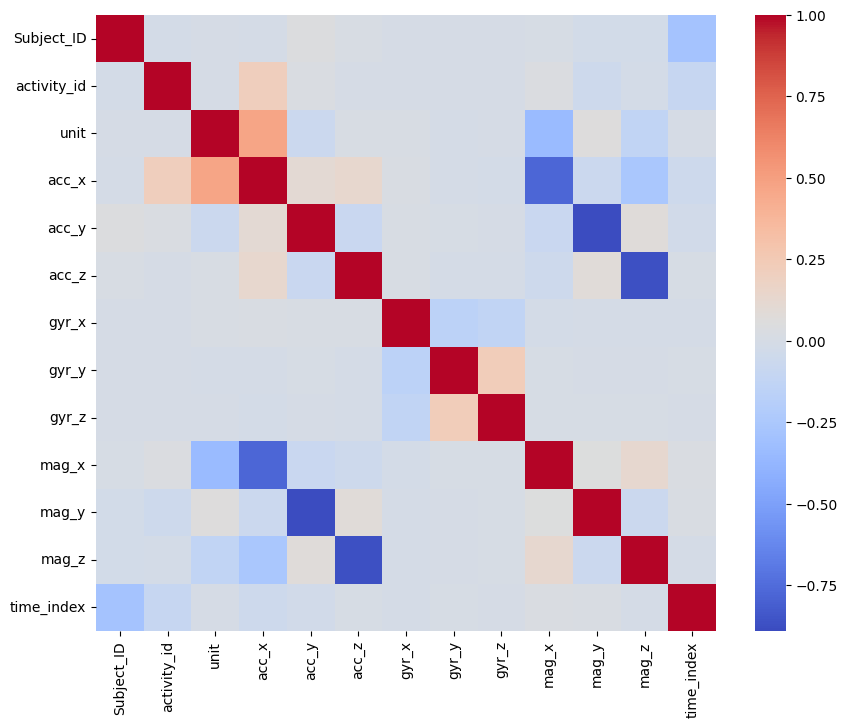

In [123]:
numerical_columns = df_raw.select_dtypes(include=['float64', 'int64','int32',]).columns
correlation_matrix = df_raw[numerical_columns].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.show()

C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

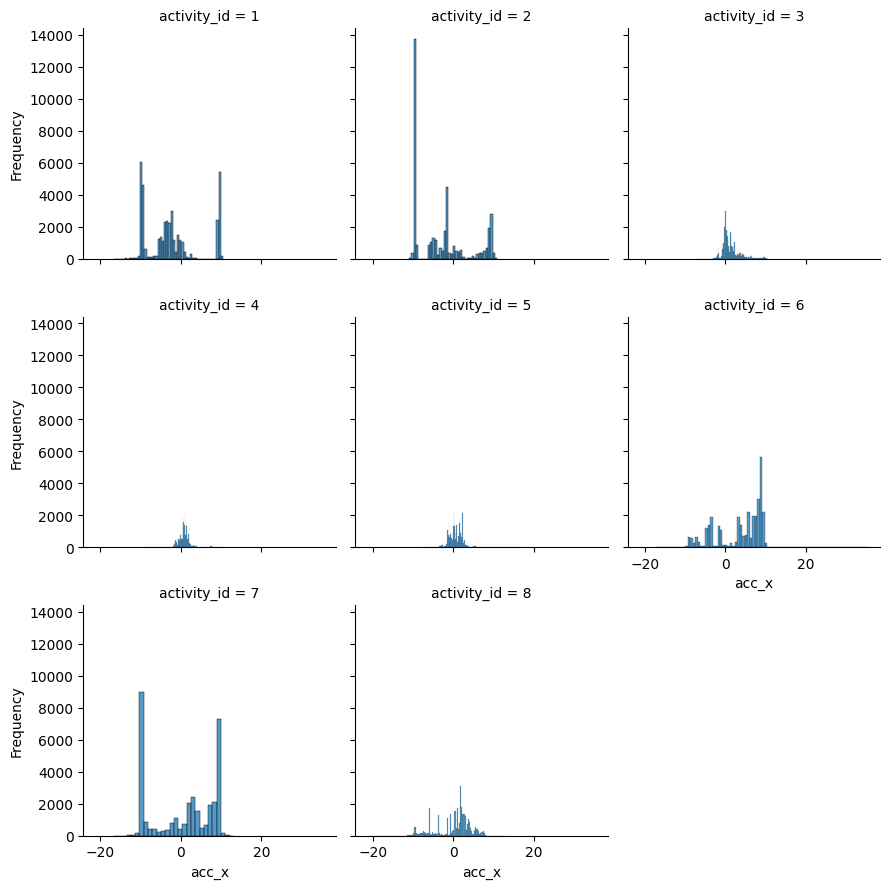

In [126]:
g = sns.FacetGrid(df_raw, col='activity_id', col_wrap=3)
g.map(sns.histplot, "acc_x")
g.set_axis_labels("acc_x", "Frequency")


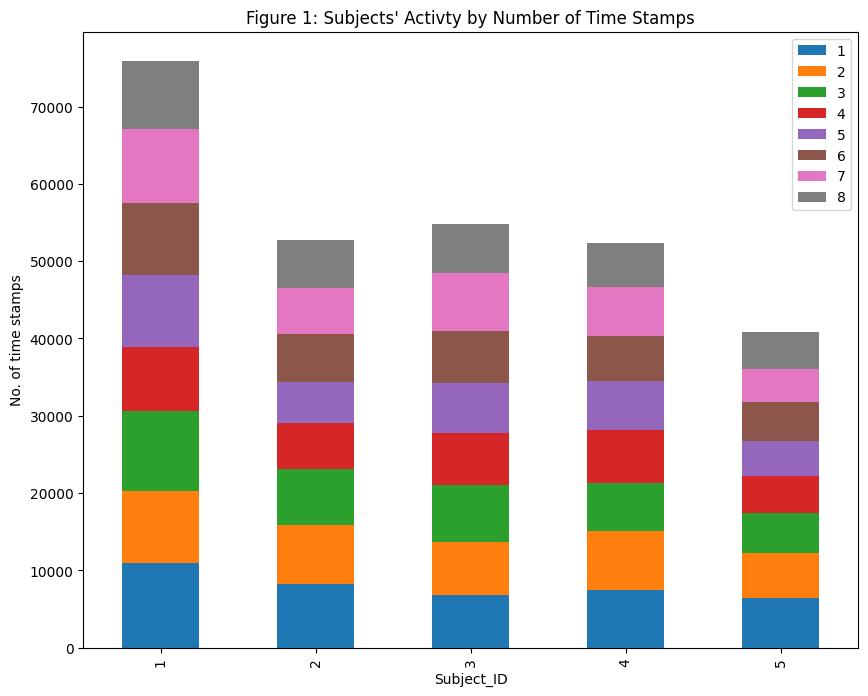

In [127]:
#bar chart
pivot1= pd.pivot_table(df_raw,values='time_index',index='Subject_ID',columns='activity_id',margins=False, aggfunc='count')
#pivot1.style.format('{:,.0f}') #apply(lambda x: '{,:.0}'.format(x))

ax=pivot1.plot(kind="bar",title="Figure 1: Subjects' Activty by Number of Time Stamps",figsize=(10,8),stacked=True);

#ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_ylabel("No. of time stamps")
#box=ax((1,1))
plt.legend(bbox_to_anchor=(1,1));
#ax.set_position(1,1.1)

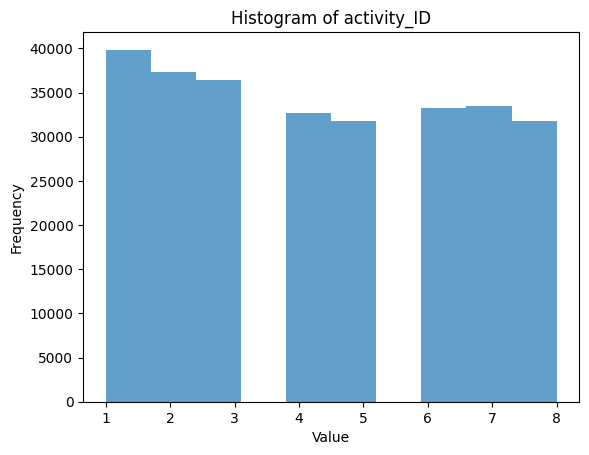

In [128]:
df_raw['activity_id'].plot(kind='hist', bins=10, alpha=0.7)
plt.xlabel('Value')  # Optional: customize X-axis label
plt.ylabel('Frequency')  # Optional: customize Y-axis label
plt.title('Histogram of activity_ID')  # Optional: add title
plt.show()


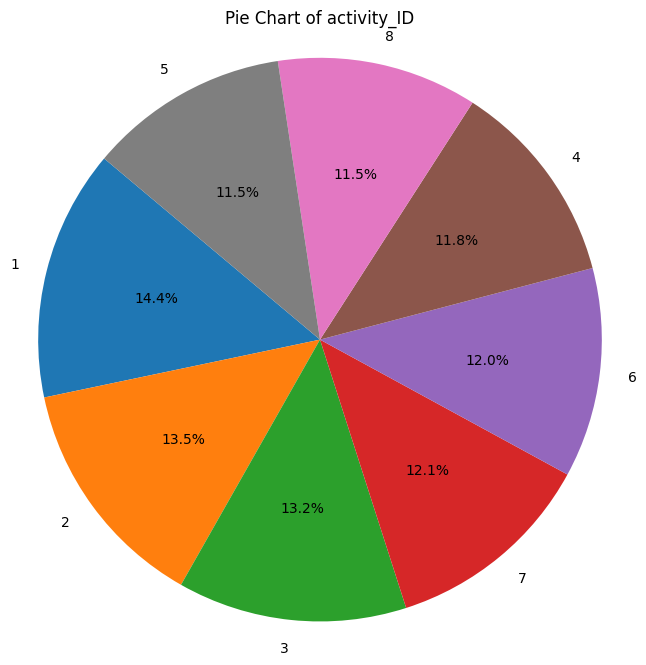

In [130]:
# Calculate value counts for 'activity_id' column
value_counts = df_raw['activity_id'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))  # Optional: customize figure size
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of activity_ID')  # Optional: add title
plt.show()

In [46]:
df_raw['activity_id'].value_counts()

activity_id
1    39845
2    37345
3    36380
7    33505
6    33285
4    32660
8    31810
5    31795
Name: count, dtype: int64

In [181]:
y_train

array([1, 1, 1, ..., 8, 8, 8])

In [209]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276625, 12) (276625,)
Test set: (281717, 12) (281717,)


In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [193]:
import numpy as np

# Assuming X_test is a NumPy array
#nan_mask_test = ~np.isnan(X_test).any(axis=1)
#X_test = X_test[nan_mask_test]

# Assuming X_train is a NumPy array
#nan_mask_train = ~np.isnan(X_train).any(axis=1)
#X_train = X_train[nan_mask_train]


In [194]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276625, 12) (276625,)
Test set: (5092, 12) (281717,)


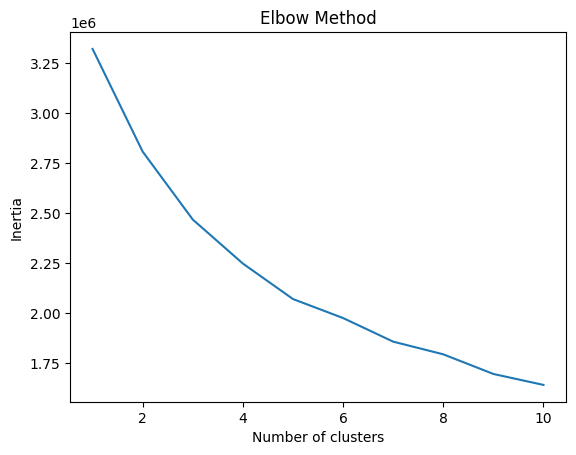

In [170]:
# Example data X

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


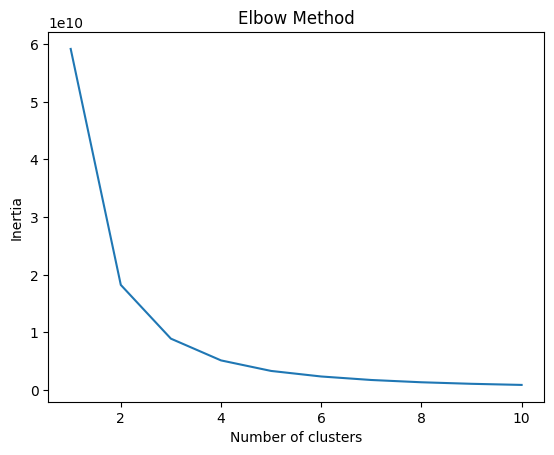

In [45]:




# Example data X

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [101]:
# Check if there are any NaN values in y_trainv
if np.isnan(y_train.astype(float)).any():
    print("NaN values found in y_train")
else:
    print("No NaN values in y_train")

No NaN values in y_train


In [102]:
# Check if there are any NaN values in y_trainv
if np.isnan(X_train.astype(float)).any():
    print("NaN values found in X_trainv")
else:
    print("No NaN values in x_trainv")

No NaN values in x_trainv


In [210]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [211]:

yhat = neigh.predict(X_test)



In [212]:
print(y_test[0:5])
print(yhat[0:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [213]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))


Train set Accuracy:  0.9985286940804338


In [214]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.9769804449145774


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [236]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 11)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [237]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [238]:
predTree = drugTree.predict(X_test)

In [239]:
print (predTree [0:5])
print (y_test [0:5])


[1 1 1 1 1]
[1 1 1 1 1]


In [240]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9488884234888203


In [300]:

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [301]:
yhatsvm = clf.predict(X_test)

In [302]:
print(yhatsvm [0:5])
print(y_test[0:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [303]:
from sklearn.metrics import f1_score
f1_score(y_test, yhatsvm, average='weighted') 

0.9911951688362133

In [307]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [308]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.97      0.99      0.98     39845
           2       0.99      0.97      0.98     37345
           3       1.00      1.00      1.00     36380
           4       0.99      1.00      1.00     32660
           5       1.00      0.99      0.99     31795
           6       0.98      1.00      0.99     33285
           7       1.00      0.98      0.99     33505
           8       1.00      1.00      1.00     36902

    accuracy                           0.99    281717
   macro avg       0.99      0.99      0.99    281717
weighted avg       0.99      0.99      0.99    281717

Confusion matrix, without normalization
[[39573   226    39     0     0     0     1     6]
 [ 1275 36066     4     0     0     0     0     0]
 [   23     0 36341     1     2    12     0     1]
 [    0     0    16 32629     6     8     0     1]
 [    1     0     4   265 31471    53     1     0]
 [    0     0     5     2     0 33265    13     0]
 [ 

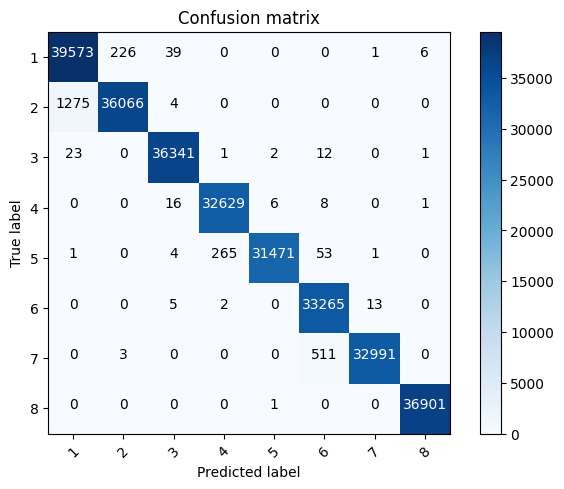

In [309]:
cnf_matrix = confusion_matrix(y_test, yhatsvm, labels=[1,2,3,4,5,6,7,8])
np.set_printoptions(precision=8)

print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1', '2','3','4','5','6','7','8'],normalize= False,  title='Confusion matrix')